In [1]:
import shapefile

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

%matplotlib inline
# plt.rcParams['figure.figsize'] = [10, 10]

In [10]:
# Load shape file

sf = shapefile.Reader("./raw-canopy-data-2016/Tree_Canopy_2016")

In [11]:
# Get some information about sf object

print(f"Shape Type: {sf.shapeType}") # 5
print(f"Shape Type Name: {sf.shapeTypeName}") # POLYGON
print(f"Number of Features: {len(sf)}") # 318487
print(f"Bounding Box: {sf.bbox}") # [-122.43490170009683, 47.49551360192607, -122.2362873091064, 47.734164349788145]

Shape Type: 1
Shape Type Name: POINT
Number of Features: 165559
Bounding Box: [-122.41902378789946, 47.495836022529915, -122.23858290846287, 47.73406906422166]


In [12]:
# Load shapes
shapes = sf.shapes() # List of shape objects

if sf.shapeTypeName == 'POLYGON': 
    polygons = [Polygon(np.array(i.points), fill=True) for i in shapes]
    # print(polygons)
    
if sf.shapeTypeName == 'POINT': 
    points = np.array([i.points[0] for i in shapes])
    # print(points)

### Properties of Polygons:
- 'bbox'
- 'parts'
- 'points'
- 'shapeType'
- 'shapeTypeName'

In [5]:
# print(f"bbox: {shapes[0].bbox}") only for polygons
print(f"parts: {shapes[0].parts}")
print(f"points: {np.array(shapes[0].points)}")
print(shapes[0].__dict__)

parts: [0]
points: [[-122.26173368   47.4961823 ]
 [-122.26172772   47.49618675]
 [-122.26172116   47.49619029]
 [-122.26171416   47.49619282]
 [-122.26170686   47.49619431]
 [-122.26169942   47.4961947 ]
 [-122.26169244   47.49619441]
 [-122.26168553   47.4961933 ]
 [-122.26167881   47.4961914 ]
 [-122.26167541   47.4961869 ]
 [-122.26167283   47.49618189]
 [-122.26167114   47.49617651]
 [-122.26167039   47.49617092]
 [-122.2616706    47.49616529]
 [-122.26167177   47.49615978]
 [-122.26167386   47.49615454]
 [-122.26167681   47.49614974]
 [-122.26168054   47.4961455 ]
 [-122.26168493   47.49614197]
 [-122.26168986   47.49613923]
 [-122.26169518   47.49613738]
 [-122.26170074   47.49613645]
 [-122.26170638   47.49613649]
 [-122.26171193   47.49613749]
 [-122.26171723   47.49613942]
 [-122.26172212   47.49614222]
 [-122.26172646   47.49614581]
 [-122.26173013   47.49615009]
 [-122.26173302   47.49615493]
 [-122.26173504   47.4961602 ]
 [-122.26173613   47.49616573]
 [-122.26173627   47

In [15]:
# Load Records
print(sf.record(1))

Record #1: [2002, 227600, 'TRE-59888', '1401 GRAND AV', '', '', 'INSVC', 'DISTRICT3', '', 'N', 36, 11953, 'TRE', 'PRIV', '', '', '1991-08-12T00:00:00.000Z', 'STJA', 'Styrax japonicus', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'OTHER', '', 6, 1, '5', 'PVT', 0, 0, 0, 'PRIV1', '', 'Japanese Snowbell Tree', 0, '', 1, 'MultiTrunk=M, TrunkLean=0, Topped=0, BrnDefect=0, TrnDefect=0, RootProb=0', '', -122.28373999053201, 47.612254515537, 'N', '', '', '2019-04-27T00:00:00.000Z', 'AE996', 16, 2371, 'Styrax', '']


In [7]:
def render_polygons(polygons, bbox=None, color=500, save_file='', res=2000):
    """
    Render given polygons. Colors must be RGB tuple with 0 <= R,G,B <= 1.
    """
    fig, ax = plt.subplots()
    patches = polygons
    
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=1)
    colors = color * np.ones(len(patches))
    p.set_array(colors)
    
    ax.add_collection(p)
    ax.autoscale_view(True)
    
    if bbox:
        ax.set_xlim(bbox[0], bbox[1])
        ax.set_ylim(bbox[2], sf.bbox[3])
        
    if len(save_file) > 0:
        plt.axis('off')
        fig.savefig(save_file, bbox_inches='tight', pad_inches=0, dpi=res)
        plt.axis('on')
        
    plt.show()

In [8]:
def render_points(points, color=500, save_file=''):
    # TODO: finish this to map the 2020 data
    colors = color * np.ones(len(patches))

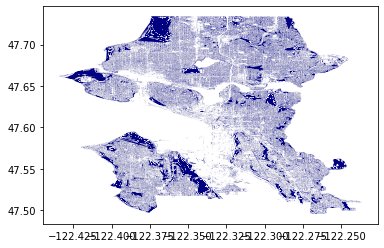

In [9]:
# Get a look at the data

render_polygons(polygons, save_file='./processed-data/trees.png')

In [ ]:
def save_records():
    records = sf.records()